In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)

not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)


2017-01-13 08:40:14	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
2017-01-13 08:40:14	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.


/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Error loading species hg19 data: HTTP Error 404: Not Found

2017-01-13 08:41:41 	Initializing Study
2017-01-13 08:41:41 	Initializing Predictor configuration manager for Study
2017-01-13 08:41:41	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2017-01-13 08:41:41	Added ExtraTreesClassifier to default predictors
2017-01-13 08:41:41	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2017-01-13 08:41:41	Added ExtraTreesRegressor to default predictors
2017-01-13 08:41:41	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2017-01-13 08:41:41	Added GradientBoostingClassifier to default predictors
2017-01-13 08:41:41	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
2017-01-13 08:41:41	Added GradientBoostingRegressor to default predictors
2017-01-13 08:41:41 	Loading metadata
2017-01-13 08:41:41	Loading expression data
2017-0

In [2]:
figure_folder = 'figures/004_global_modality_stats'
! mkdir $figure_folder

In [3]:
event = 'exon:chr10:1043148-1043248:+@exon:chr10:1044943-1045035:+@exon:chr10:1046617-1046808:+'

event in study.splicing.data

False

In [4]:
modalities_counts = study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']).count().reset_index()
modalities_counts = modalities_counts.rename(columns={'event_id': '# AS events'})
modalities_counts.head()

,phenotype,modality,# AS events
0,MN,bimodal,1235
1,MN,excluded,2216
2,MN,included,3137
3,MN,uncategorized,9
4,NPC,bimodal,1910


In [5]:
from anchor import MODALITY_ORDER, MODALITY_PALETTE, MODALITY_TO_COLOR

modalities_counts_2d = modalities_counts.pivot(index='phenotype', columns='modality', values='# AS events')
modalities_counts_2d = modalities_counts_2d.reindex(columns=MODALITY_ORDER, index=study.phenotype_order)
modalities_counts_2d = modalities_counts_2d.T
modalities_counts_2d

phenotype,iPSC,NPC,MN
modality,,,
excluded,3725.0,2970.0,2216.0
bimodal,2679.0,1910.0,1235.0
included,6182.0,4514.0,3137.0
middle,1.0,NaN,NaN
uncategorized,74.0,20.0,9.0


In [6]:
modalities_counts_2d = modalities_counts_2d.fillna(0)
modalities_counts_2d

phenotype,iPSC,NPC,MN
modality,,,
excluded,3725.0,2970.0,2216.0
bimodal,2679.0,1910.0,1235.0
included,6182.0,4514.0,3137.0
middle,1.0,0.0,0.0
uncategorized,74.0,20.0,9.0


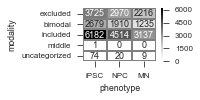

In [8]:
sns.set(style='ticks', context='paper')
fig, ax= plt.subplots(figsize=(2.75, 1.5))
mask = modalities_counts_2d.isnull()
sns.heatmap(modalities_counts_2d, annot=True, mask=mask, fmt='g', annot_kws=dict(size=9), 
            cmap='Greys', linewidth=1, linecolor='grey')
fig.tight_layout()
fig.savefig('{}/modalities_counts_heatmap.pdf'.format(figure_folder))

In [9]:
modalities_counts['percentage'] = 100*modalities_counts.groupby('phenotype')['# AS events'].apply(lambda x: x/x.sum())
modalities_counts

,phenotype,modality,# AS events,percentage
0,MN,bimodal,1235,18.720631
1,MN,excluded,2216,33.591026
2,MN,included,3137,47.551918
3,MN,uncategorized,9,0.136426
4,NPC,bimodal,1910,20.288931
5,NPC,excluded,2970,31.548757
6,NPC,included,4514,47.949862
7,NPC,uncategorized,20,0.212450
8,iPSC,bimodal,2679,21.159466
9,iPSC,excluded,3725,29.421057


In [10]:
from anchor import MODALITY_ORDER, MODALITY_PALETTE, MODALITY_TO_COLOR

## Barplots

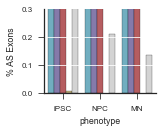

In [12]:

fig, ax = plt.subplots(figsize=(2, 1.5))

# ax = axes[0]
sns.barplot(x='phenotype', hue='modality', y='percentage', data=modalities_counts, ax=ax,
            hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, x_order=study.phenotype_order, zorder=-1)
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
ax.set(ylabel='% AS Exons')
ax.grid(axis='y', color='white', zorder=100)
sns.despine()
fig.savefig('{}/modalities_barplot.pdf'.format(figure_folder))

ax.set(ylim=(0, 0.3))
# ax.grid(axis='y', color='grey', zorder=np.inf)
fig.savefig('{}/modalities_barplot_zoom.pdf'.format(figure_folder))

# ax.legend_.set_visible(False)
# ax.locator_params('y', nbins=4)
# sns.despine(ax=ax, bottom=True)
# ax.tick_params(axis='x', bottom='off')
# ax.set(xticks=[], xlabel='', ylim=(10, 65), ylabel='', yticks=[10, 35, 60])

# ax = axes[1]
# sns.barplot(x='phenotype', hue='modality', y='percentage', data=modalities_counts, ax=ax,
#            hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, x_order=study.phenotype_order)
# ax.set(ylim=(0, 0.5), ylabel='% AS Exons', 
#        xlabel='')
# ax.legend_.set_visible(False)
# ax.locator_params('y', nbins=4)
# sns.despine(ax=ax)
# # fig.tight_layout()
# fig.savefig('{}/modalities_barplot.pdf'.format(folder))

### Split axes barplot

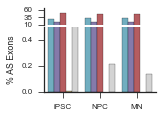

In [13]:

fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(2, 1.5), 
                         gridspec_kw=dict(hspace=0.05, height_ratios=[0.2, 0.8]))

ax = axes[0]
sns.barplot(x='phenotype', hue='modality', y='percentage', data=modalities_counts, ax=ax,
            hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, x_order=study.phenotype_order)
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
sns.despine(ax=ax, bottom=True)
ax.tick_params(axis='x', bottom='off')
ax.set(xticks=[], xlabel='', ylim=(10, 65), ylabel='', yticks=[10, 35, 60])

ax = axes[1]
sns.barplot(x='phenotype', hue='modality', y='percentage', data=modalities_counts, ax=ax,
           hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, x_order=study.phenotype_order)
ax.set(ylim=(0, 0.5), ylabel='% AS Exons', 
       xlabel='')
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
sns.despine(ax=ax)
# fig.tight_layout()
fig.savefig('{}/modalities_barplot_split_axes.pdf'.format(figure_folder))

## Venn diagrams

In [14]:
import matplotlib_venn

sns.set(context='paper', style='ticks')

from anchor import MODALITY_ORDER

study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']).size()

phenotype  modality     
MN         bimodal          1235
           excluded         2216
           included         3137
           uncategorized       9
NPC        bimodal          1910
           excluded         2970
           included         4514
           uncategorized      20
iPSC       bimodal          2679
           excluded         3725
           included         6182
           middle              1
           uncategorized      74
dtype: int64

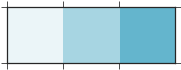

In [15]:
sns.palplot(sns.light_palette(MODALITY_PALETTE[0], n_colors=3))

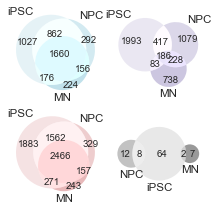

In [16]:
from anchor import MODALITY_TO_CMAP

fig, axes = plt.subplots(figsize=(3, 3), nrows=2, ncols=2)

axes_iter = axes.flat

grouped_modality = study.supplemental.modalities_tidy.groupby('modality')

for modality in MODALITY_ORDER:
    modality_df = grouped_modality.get_group(modality)
    if modality == 'middle':
        continue
    grouped_phenotype = modality_df.groupby('phenotype')
    sets = [set(grouped_phenotype.get_group(phenotype)['event_id']) for phenotype in study.phenotype_order]
    
    ax = axes_iter.next()
    cmap = MODALITY_TO_CMAP[modality]

    set_colors = cmap(np.linspace(0, 1, 4))[1:]

#     set_colors = sns.light_palette(MODALITY_TO_COLOR[modality], n_colors=3)
#     set_colors = study.phenotype_color_ordered
    matplotlib_venn.venn3(sets, set_labels=study.phenotype_order, set_colors=set_colors, ax=ax)
#     ax.set(title=modality)
fig.tight_layout()
fig.savefig('{}/venn_diagrams.pdf'.format(figure_folder))